#### Quick peek

In [1]:
#imports & load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('olympics.csv')
df.info()

#has 1k+ rows, 16 columns
#each row represents a country for a given year
#each column represents a metric

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                1188 non-null   object 
 1   country_3_letter_code       1188 non-null   object 
 2   year                        1188 non-null   int64  
 3   medal_count                 1188 non-null   int64  
 4   gold_count                  1188 non-null   int64  
 5   silver_count                1188 non-null   int64  
 6   bronze_count                1188 non-null   int64  
 7   game_location               1188 non-null   object 
 8   game_season                 1188 non-null   object 
 9   GDP                         1188 non-null   float64
 10  population                  1188 non-null   float64
 11  region                      1188 non-null   object 
 12  area_sqkm                   1188 non-null   int64  
 13  coastline_coast_area_ratio  1188 

In [2]:
#select relevant cols (excludes country_3_letter_code, gold_, silver_, bronze_count)
selected_cols= ['country_name', 'year', 'medal_count', 'game_location', 'game_season', 
                'GDP', 'population', 'region', 'area_sqkm', 'coastline_coast_area_ratio',
               'GDP_per_capita', 'host_country_status']

df= df[selected_cols]

#create GDP growth rate variable
df['GDP_growth_rate']= df.sort_values(['country_name', 'year']).groupby('country_name')['GDP'].pct_change() * 100

df.info()
#has same number of rows, now only 13 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   country_name                1188 non-null   object 
 1   year                        1188 non-null   int64  
 2   medal_count                 1188 non-null   int64  
 3   game_location               1188 non-null   object 
 4   game_season                 1188 non-null   object 
 5   GDP                         1188 non-null   float64
 6   population                  1188 non-null   float64
 7   region                      1188 non-null   object 
 8   area_sqkm                   1188 non-null   int64  
 9   coastline_coast_area_ratio  1188 non-null   float64
 10  GDP_per_capita              1188 non-null   float64
 11  host_country_status         1188 non-null   int64  
 12  GDP_growth_rate             1058 non-null   float64
dtypes: float64(5), int64(4), object(4

In [3]:
#pull years where olympics occurred
unique_years= df['year'].unique()
olympic_years= df[df['medal_count'] > 0]['year'].unique()
df= df[df['year'].isin(olympic_years)]

#### Fun observation: 
Between 1960 and 2020, the number of countries participating in the olympics increases nearly 200%.

Was it because there more interest? More resources to send athletes to the games? Or simply because new countries emerged?

In [4]:
#number of countries participating in 1960
df_year= df[df['year'] == 1960]
df_year['country_name'].nunique()

30

In [5]:
#number of countries participating in 2020
df_year= df[df['year'] == 2020]
df_year['country_name'].nunique()

89

#### Summary statistics

In [6]:
df.describe()

#data comprises 1188 entries from various Olympic Games betwwen 1960 & 2020

#avg number of medals won per country is about 11, but has a wide standard deviation of 
    #around 18, indicating substantial variability in medal counts
    
#GDP values range from $222 million to over $21 trillion, reflecting a broad economic 
    #spectrum among participating countries

#avg population is about 66 million, but has a significant spread from about 23,000 
    #to 1.4 billion
    
#host country status is predominantly non-host

,year,medal_count,GDP,population,area_sqkm,coastline_coast_area_ratio,GDP_per_capita,host_country_status,GDP_growth_rate
count,1188.000000,1188.000000,1.188000e+03,1.188000e+03,1.188000e+03,1188.000000,1188.000000,1188.000000,1058.000000
mean,1996.712121,10.917508,6.713270e+11,6.620000e+07,1.575186e+06,2.948830,15032.769879,0.021886,72.638339
std,17.111595,17.969925,1.926417e+12,1.856616e+08,3.286887e+06,9.961977,18348.104378,0.146371,849.819655
min,1960.000000,1.000000,2.221006e+08,2.341600e+04,5.300000e+01,0.000000,81.586947,0.000000,-90.112579
25%,1984.000000,2.000000,2.484845e+10,6.198660e+06,8.387000e+04,0.150000,2097.660228,0.000000,0.000000
50%,2000.000000,5.000000,1.166585e+11,1.574207e+07,3.238020e+05,0.470000,7215.010734,0.000000,16.363536
75%,2012.000000,12.000000,4.418608e+11,5.622790e+07,8.015900e+05,2.450000,22898.605685,0.000000,52.435199
max,2020.000000,174.000000,2.106047e+13,1.411100e+09,1.707520e+07,194.340000,175286.619287,1.000000,27373.129388


#### Visualizations

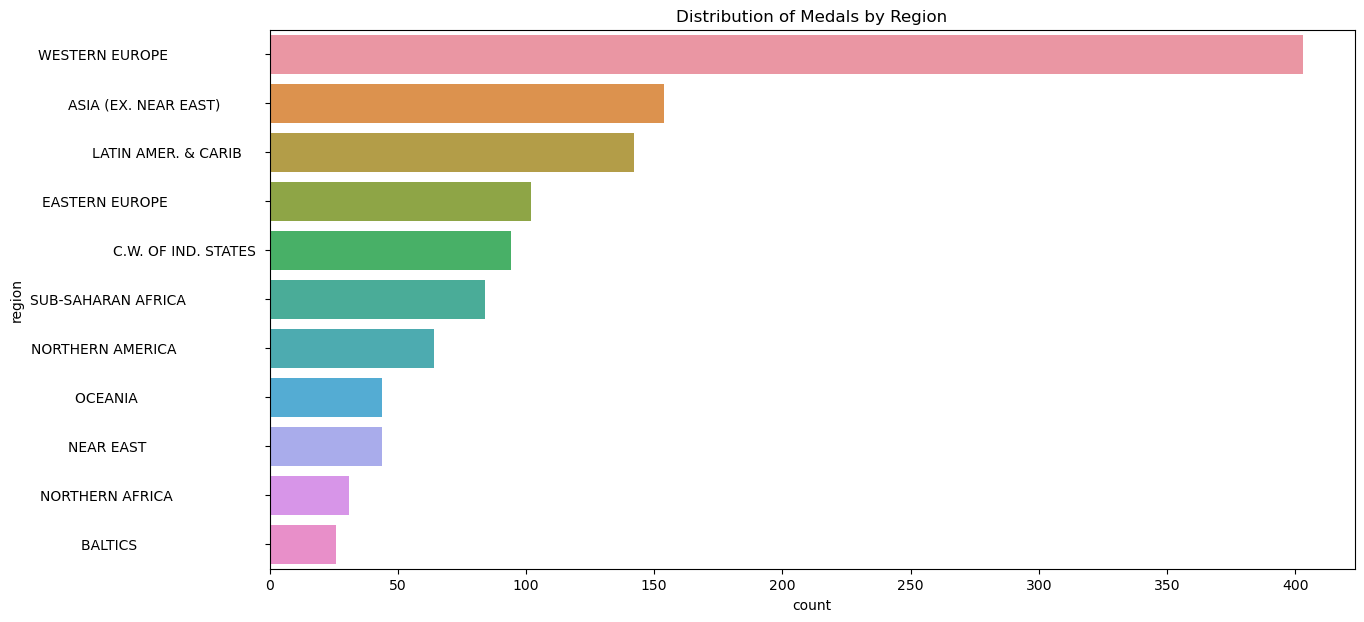

In [7]:
#distribution of medals by region (aggregate)
plt.figure(figsize=(14, 7))
sns.countplot(data=df, y='region', order=df['region'].value_counts().index)
plt.xticks(rotation=0)
plt.title('Distribution of Medals by Region')
plt.show()

#western europe dominates w/ highest medal count; has more than double the medals of #2 asia

           country_name  medal_count
123       United States         1829
42              Germany         1338
94   Russian Federation          858
21                China          696
57                Italy          532
122      United Kingdom          526
39               France          515
59                Japan          481
4             Australia          472
19               Canada          411


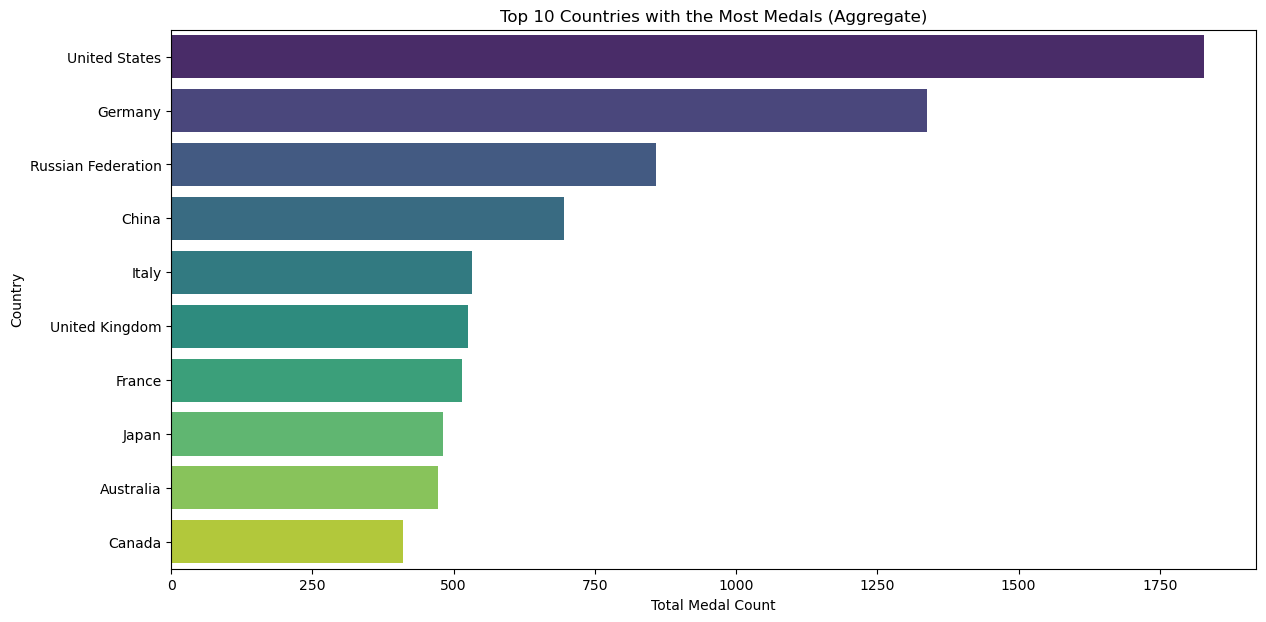

In [8]:
#top 10 countries w/ the most aggregate medals from 1960-2020

#group by country & sum medal counts
country_medal_count= df.groupby('country_name')['medal_count'].sum().reset_index()

#sort medal count desc
top10= country_medal_count.sort_values(by='medal_count', ascending=False).head(10)
print(top10)

#plot
plt.figure(figsize=(14, 7))
sns.barplot(data=top10, y='country_name', x='medal_count', palette='viridis')
plt.title('Top 10 Countries with the Most Medals (Aggregate)')
plt.xlabel('Total Medal Count')
plt.ylabel('Country')
plt.show()

#usa leads w/ the highest medal count (1829)

#then germany (1338) > russian federation (858) > china (696)

#next 6 countries have roughly the same amount of medals

Top 10 Countries in Summer Games:
          country_name  medal_count
32       United States         1577
13             Germany          978
24  Russian Federation          669
6                China          634
31      United Kingdom          505
0            Australia          457
16               Japan          424
15               Italy          414
12              France          403
18         Korea, Rep.          281

Top 10 Countries in Winter Games:
          country_name  medal_count
13             Germany          360
22              Norway          281
32       United States          252
1              Austria          192
24  Russian Federation          189
5               Canada          181
20         Netherlands          127
11             Finland          121
15               Italy          118
28              Sweden          117


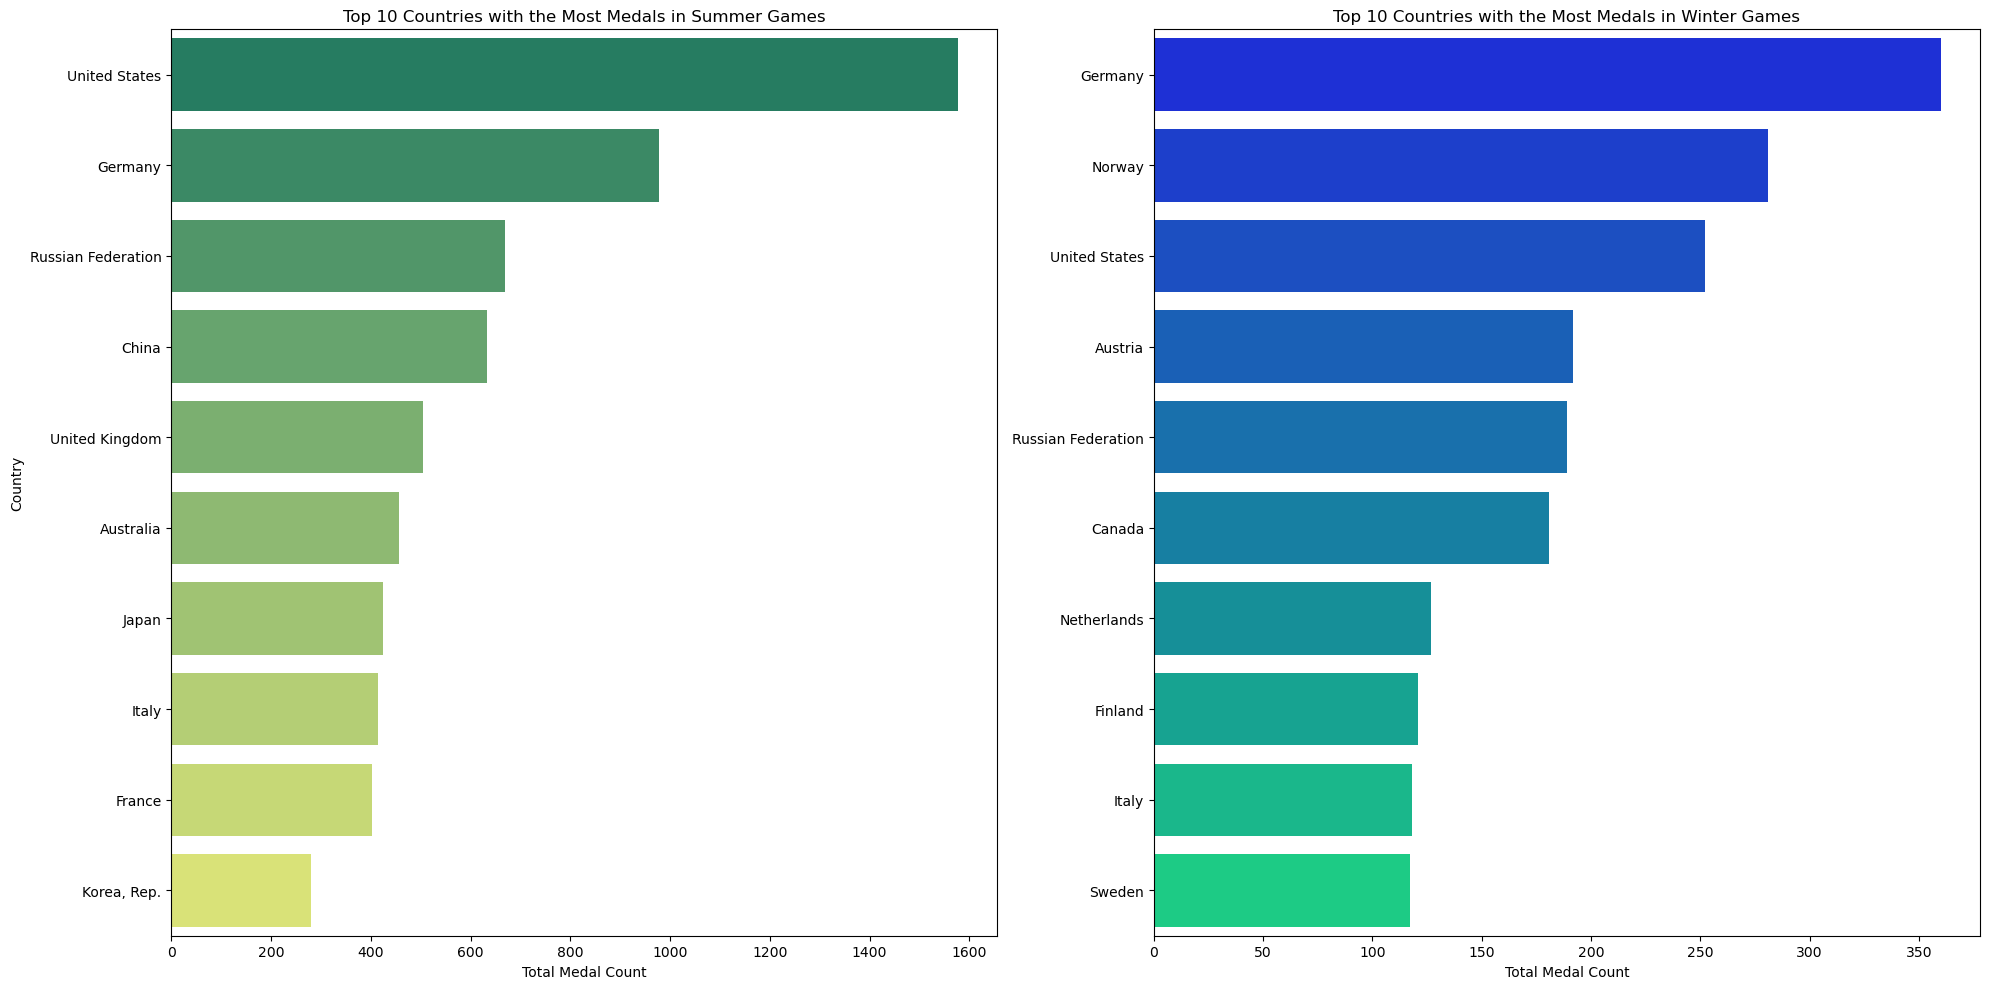

In [9]:
#see if top 10 are the same across summer & winter

#filter by game_season
summer_df= df[df['game_season'] == 'Summer']
winter_df= df[df['game_season'] == 'Winter']

#find countries that participated in both seasons
summer_countries= set(summer_df['country_name'].unique())
winter_countries= set(winter_df['country_name'].unique())
both_games_countries= summer_countries.intersection(winter_countries)
df_both_games= df[df['country_name'].isin(both_games_countries)]

#filter by game_season for countries who participated in both seasons
summer_df_both_games = df_both_games[df_both_games['game_season'] == 'Summer']
winter_df_both_games = df_both_games[df_both_games['game_season'] == 'Winter']

#group by country & sum medal counts for summer
summer_medal_count = summer_df_both_games.groupby('country_name')['medal_count'].sum().reset_index()
top_10_summer_countries = summer_medal_count.sort_values(by='medal_count', ascending=False).head(10)
print('Top 10 Countries in Summer Games:')
print(top_10_summer_countries)

#group by country & sum medal counts for winter
winter_medal_count = winter_df_both_games.groupby('country_name')['medal_count'].sum().reset_index()
top_10_winter_countries = winter_medal_count.sort_values(by='medal_count', ascending=False).head(10)
print('\nTop 10 Countries in Winter Games:')
print(top_10_winter_countries)

#plot
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
sns.barplot(data=top_10_summer_countries, y='country_name', x='medal_count', palette='summer')
plt.title('Top 10 Countries with the Most Medals in Summer Games')
plt.xlabel('Total Medal Count')
plt.ylabel('Country')

plt.subplot(1, 2, 2)
sns.barplot(data=top_10_winter_countries, y='country_name', x='medal_count', palette='winter')
plt.title('Top 10 Countries with the Most Medals in Winter Games')
plt.xlabel('Total Medal Count')
plt.ylabel('')

plt.tight_layout()
plt.show()

#countries like usa, germany, & russian federation perform well in both seasons. others
    #like norway & austria have strong performances in winter games, while countries like 
    #china & korea excel more in summer

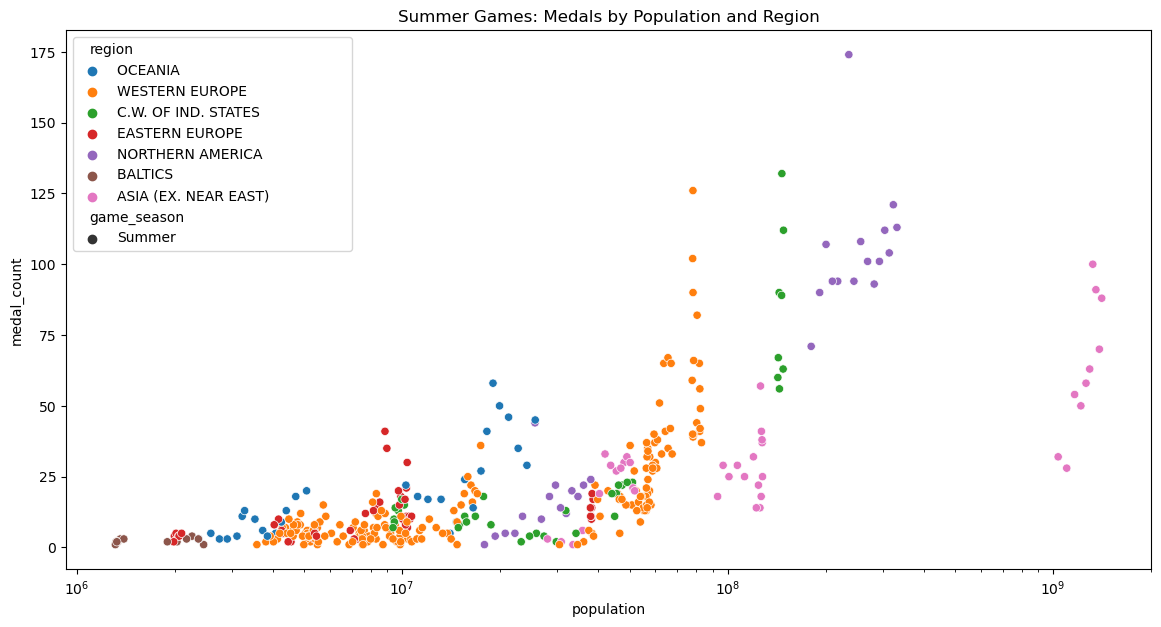

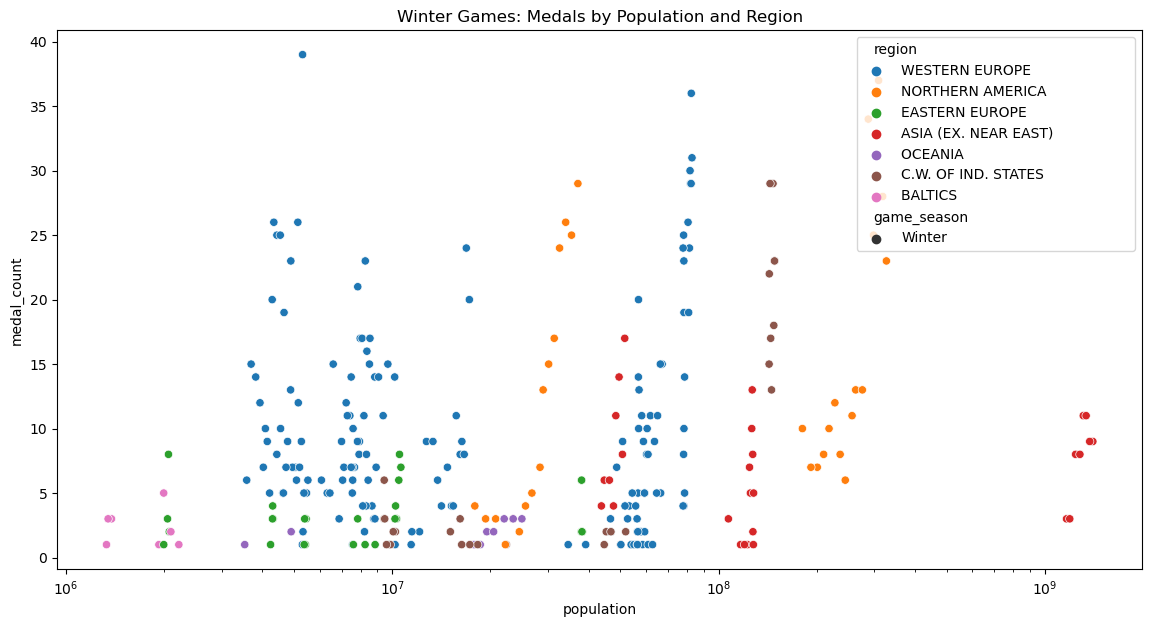

In [10]:
#plots for population for summer & winter

#summer
plt.figure(figsize=(14, 7))
sns.scatterplot(data=summer_df_both_games, x='population', y='medal_count', hue='region', style='game_season')
plt.xscale('log')
plt.title('Summer Games: Medals by Population and Region')
plt.show()

#scatterplot shows a somewhat positive correlation between population & medal count;
    #indicates that countries w/ larger pop. tend to win more medals in the summer.
    
#west europe & north america are noteable high-population, high-medal continents;
    #oceania, the baltics, and other regions w/ small pop. tend to have lower medal counts

#winter
plt.figure(figsize=(14, 7))
sns.scatterplot(data=winter_df_both_games, x='population', y='medal_count', hue='region', style='game_season')
plt.xscale('log')
plt.title('Winter Games: Medals by Population and Region')
plt.show()

#scatter plot for winter shows a less pronounced correlation b/w the two; there's more
    #variation, meaning that during winter season pop. & medals don't relate as much

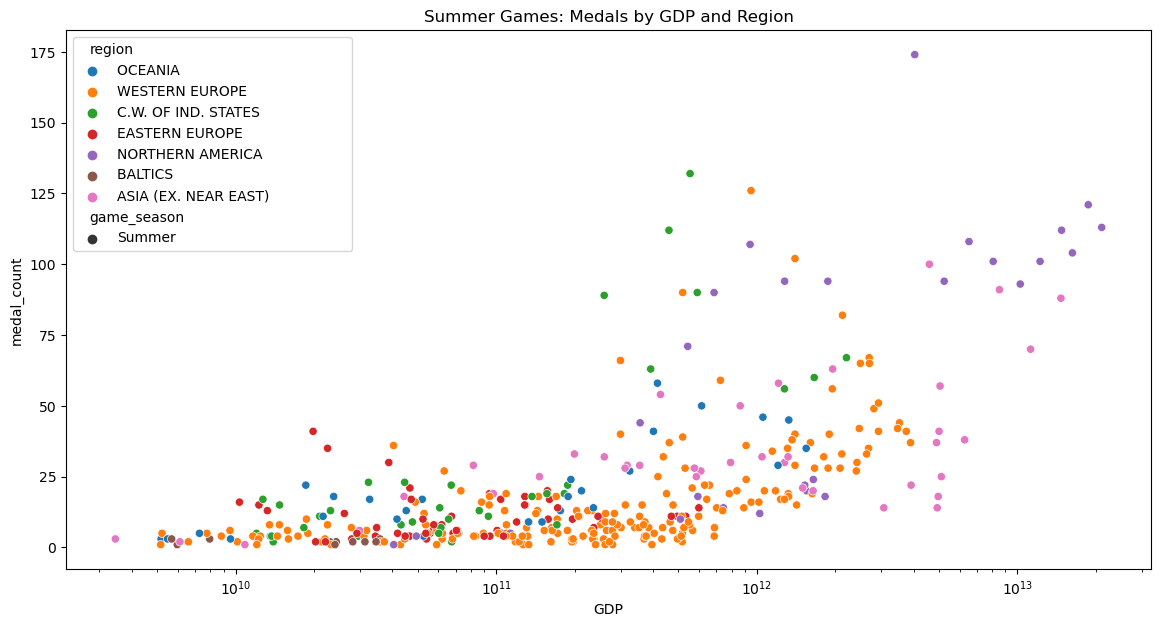

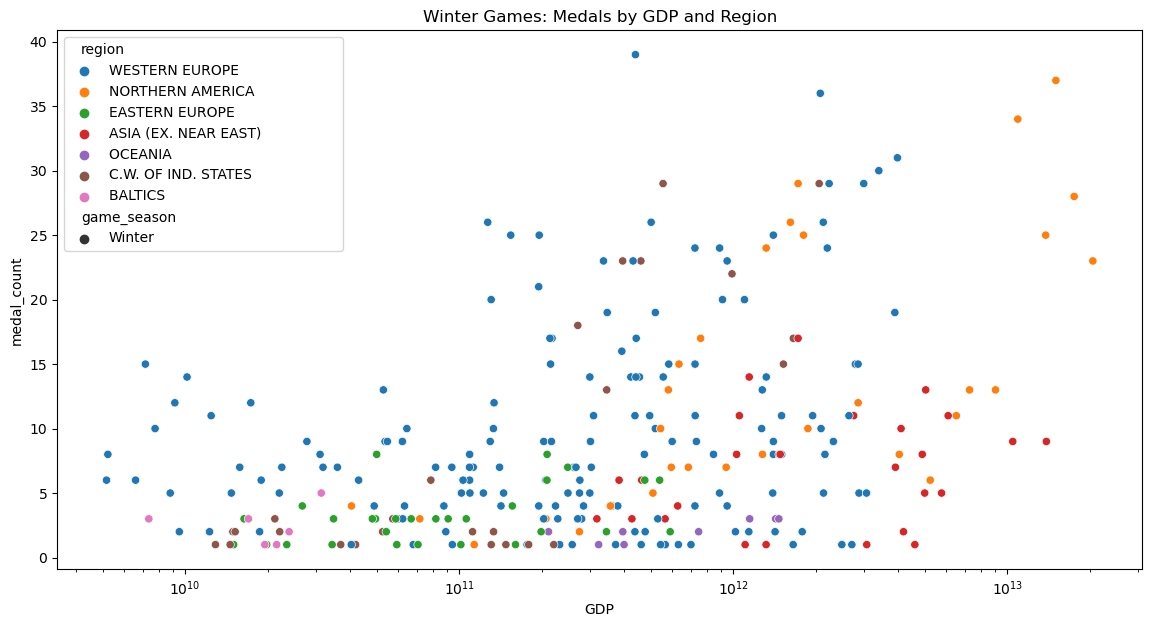

In [11]:
#plots for GDP for summer & winter

#summer
plt.figure(figsize=(14, 7))
sns.scatterplot(data=summer_df_both_games, x='GDP', y='medal_count', hue='region', style='game_season')
plt.xscale('log')
plt.title('Summer Games: Medals by GDP and Region')
plt.show()

#winter
plt.figure(figsize=(14, 7))
sns.scatterplot(data=winter_df_both_games, x='GDP', y='medal_count', hue='region', style='game_season')
plt.xscale('log')
plt.title('Winter Games: Medals by GDP and Region')
plt.show()


#while GDP is an important factor in medal counts, winter games show more variability and 
    #less dependence on GDP compared to the summer; this may be due to other influences 
    #(outside of this data) like regional factors & participation in specific sports

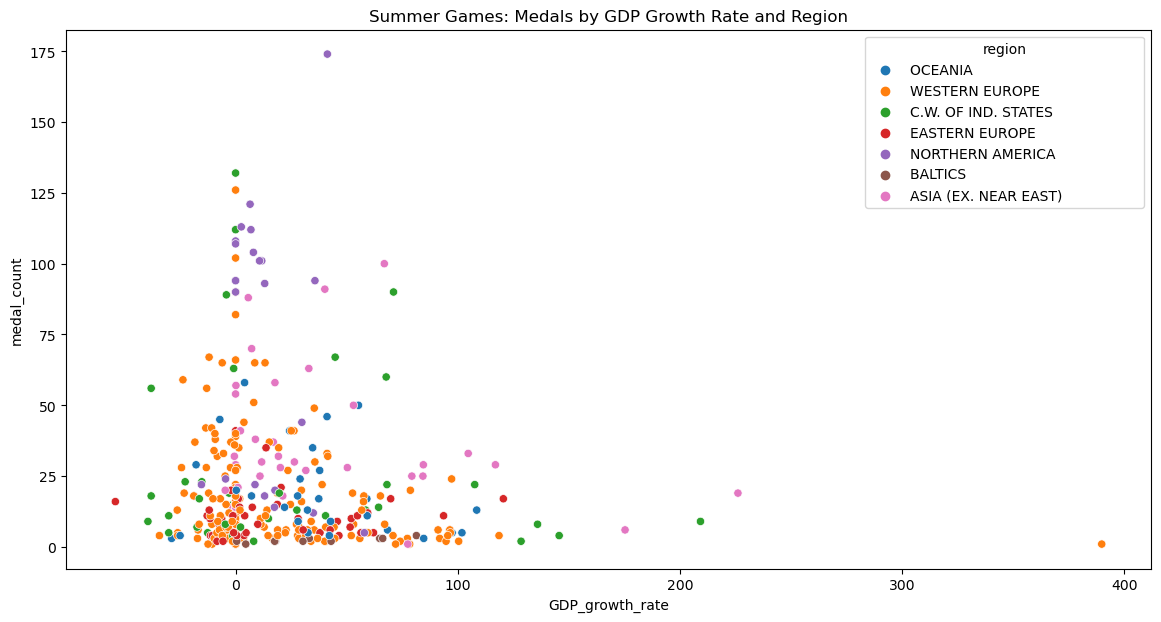

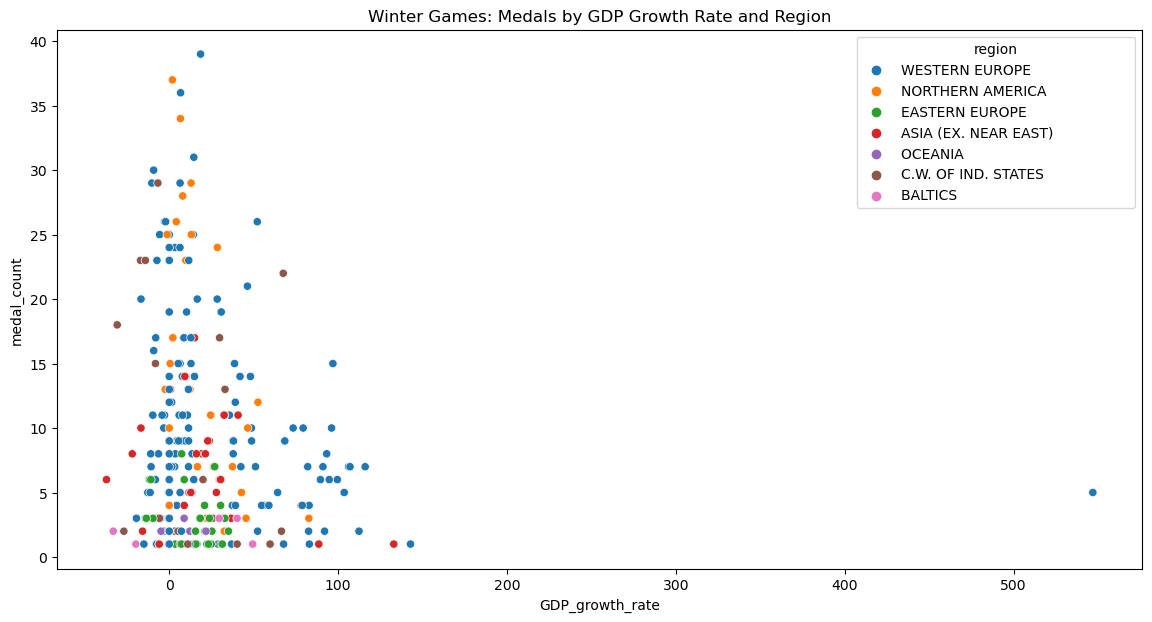

In [12]:
#relationship between GDP growth rate & medal counts

#plot
#summer
plt.figure(figsize=(14, 7))
sns.scatterplot(data=summer_df_both_games, x='GDP_growth_rate', y='medal_count', hue='region')
plt.title('Summer Games: Medals by GDP Growth Rate and Region')
plt.show()

#winter
plt.figure(figsize=(14, 7))
sns.scatterplot(data=winter_df_both_games, x='GDP_growth_rate', y='medal_count', hue='region')
plt.title('Winter Games: Medals by GDP Growth Rate and Region')
plt.show()

#GDP growth rate doesn't seem to be a strong predictor of medal counts in either season;
    #could be due to their inherent yearly variability influenced by things like inflation,
    #economic policies, & national emergencies or recessions, etc.

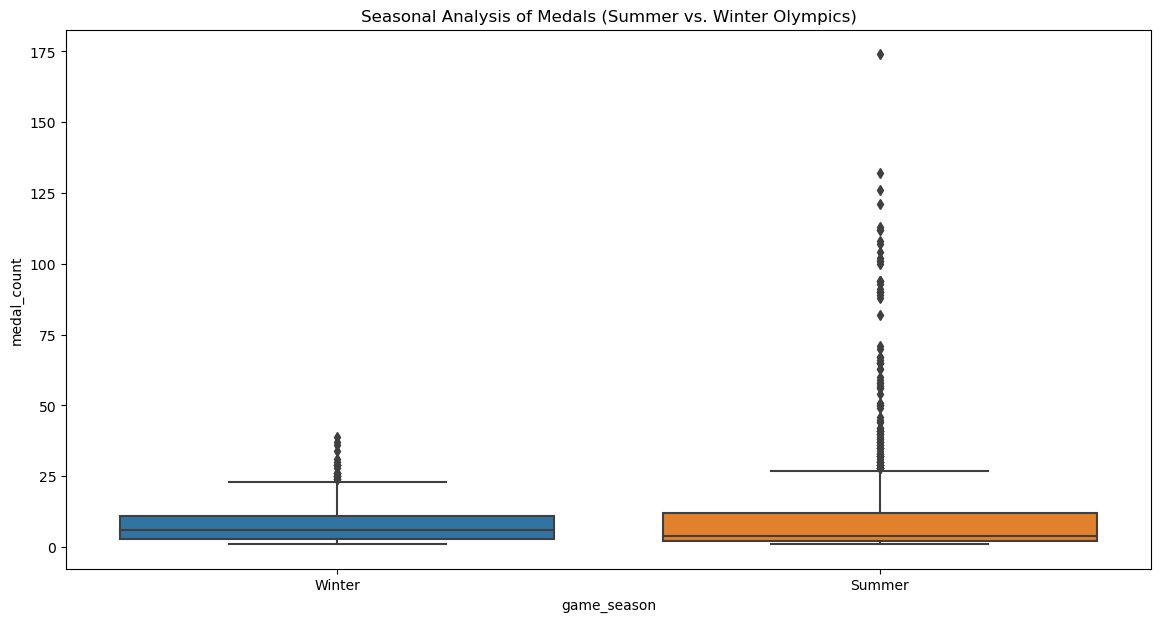

In [14]:
#seasonal analysis (summer vs. winter)
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='game_season', y='medal_count')
plt.title('Seasonal Analysis of Medals (Summer vs. Winter Olympics)')
plt.show()

#median medal count is higher for the summer compared to winter; but IQR for summer is 
    #larger, meaning there's greater variability in medal counts among countries
    
#summer has more outliers w/ high medal counts with some winning significantly more medals
    #compared to when they compete in the winter

#winter games have a more compact distribution, w/ fewer countries achieving very high 
    #medal counts.

#overall, countries tend to win more medals in the summer than in the winter; this could
    #be a reflection of the greater number of events & participants in the summer

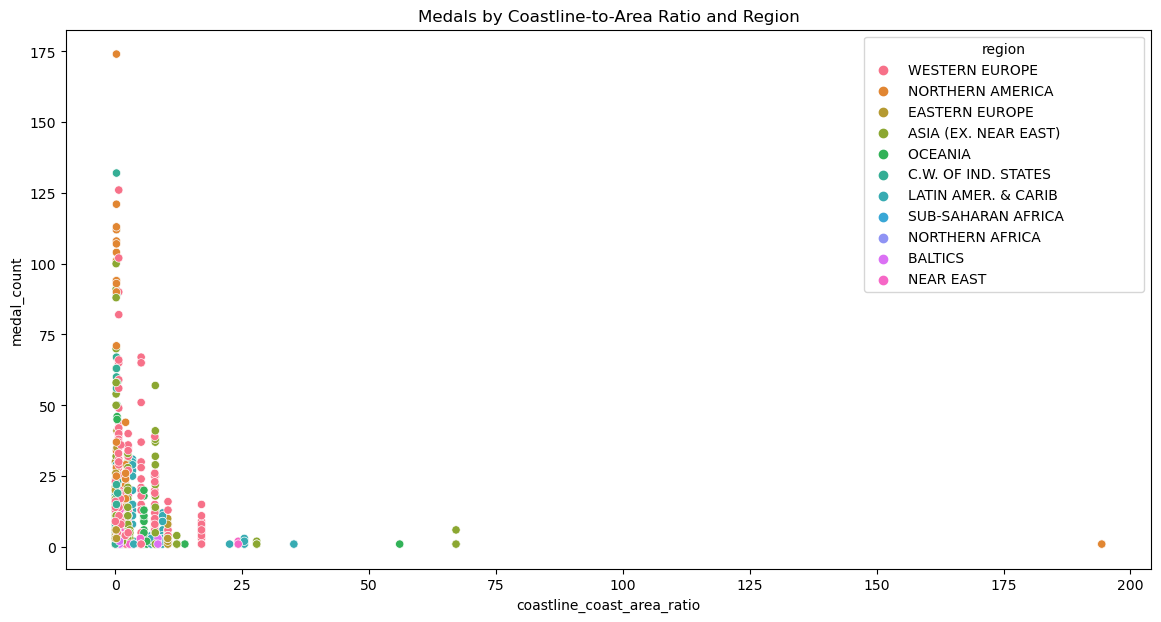

In [15]:
#relationship between coastline-to-area ratio & medal counts
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='coastline_coast_area_ratio', y='medal_count', hue='region')
plt.title('Medals by Coastline-to-Area Ratio and Region')
plt.show()

#overall trend suggests that while some countries with low coastline-to-area ratios perform
    #well in terms of medal counts, the coastline-to-area ratio alone is not a strong 
    #predictor of olympic success (regions like western europe, northern america, & asia 
    #have countries w/ higher medal counts, despite low coastline-to-area ratios)

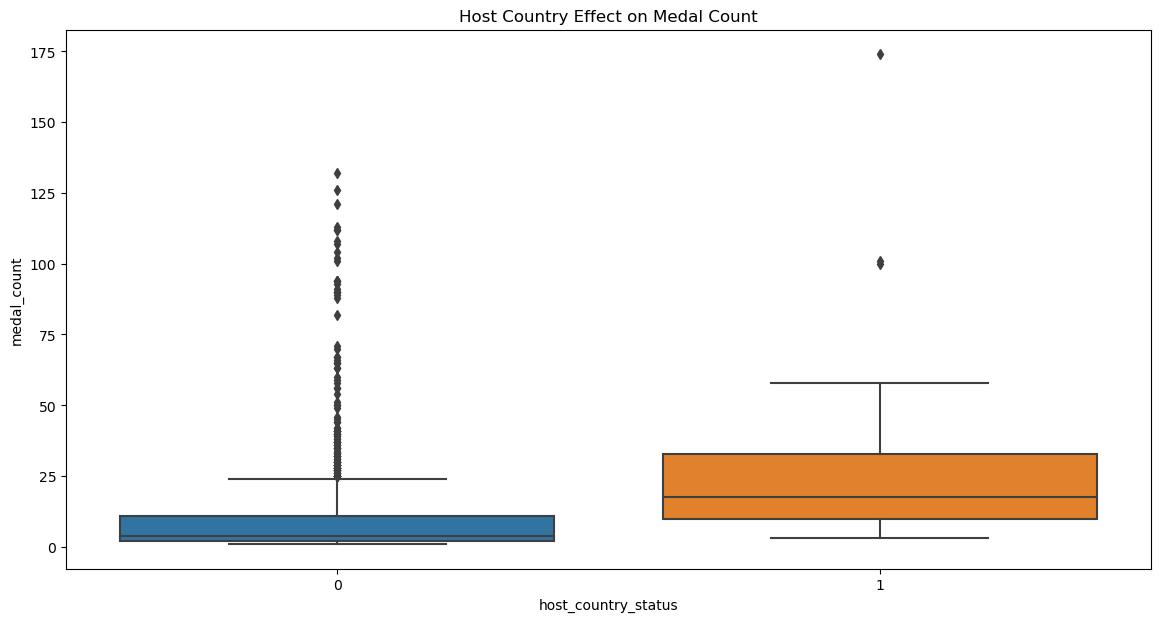

In [17]:
#host country effect on aggregate medal count
plt.figure(figsize=(14, 7))
sns.boxplot(data=df, x='host_country_status', y='medal_count')
plt.title('Host Country Effect on Medal Count')
plt.show()

#host countries (status= 1) generally have higher median medal counts compared to non-host
    #countries (status= 0); but hosts exhibit a wider IQR, indicating more variability in 
    #the number of medals won
    
#non-host countries tend to have a more compact distribution of medal counts, w/ fewer
    #instances of extremely high medal counts
    
#overall, plot suggests that being the host country positively impacts the number of medals
    #won, probably due to factors like home advantage, better prep, & increased investment
    #in athletes + infrastructure.

#### Correlation matrix

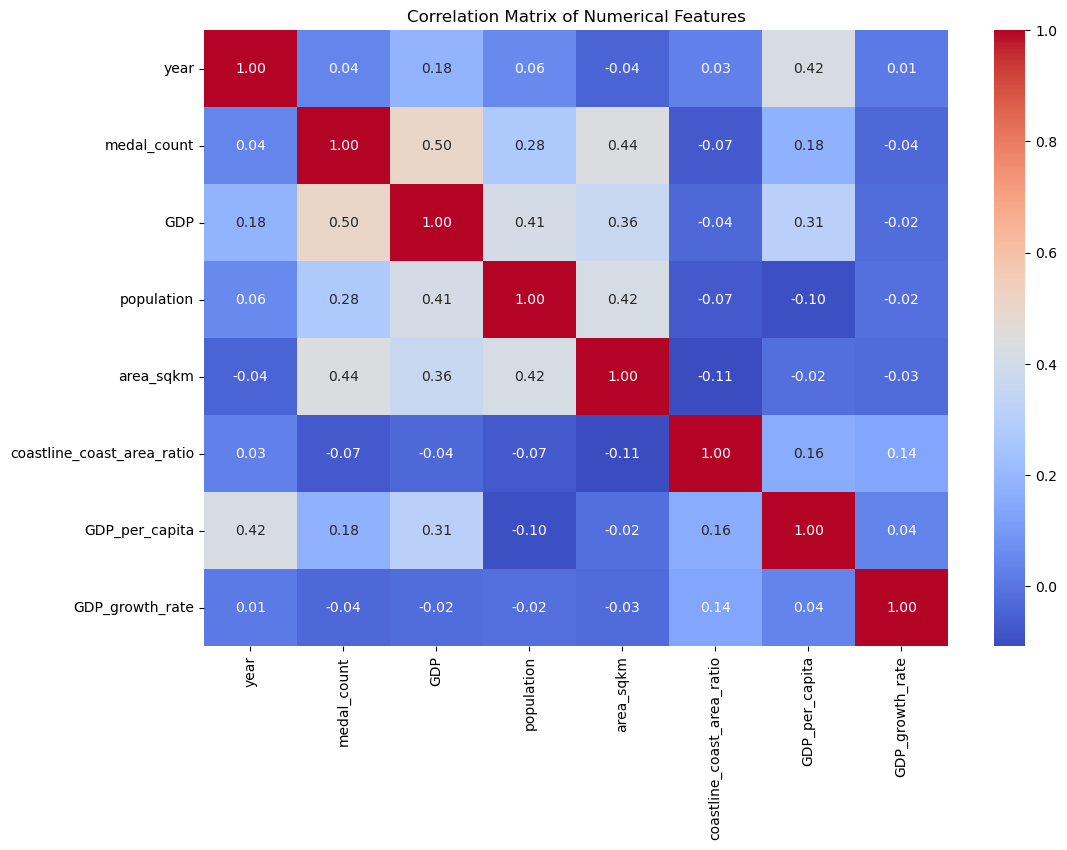

In [18]:
#select numerical columns
numerical_cols = ['year', 'medal_count', 'GDP', 'population', 'area_sqkm', 'coastline_coast_area_ratio', 'GDP_per_capita', 'GDP_growth_rate']

#correlation matrix
corr_matrix = df[numerical_cols].corr()

#plot
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

#VERY weak correlations; only moderate positive correlation is between GDP & medal_counts

#other slightly positive correlations are population & area_sqkm

#most factors have minimal impact on predicting olympic success

#### Conclusion

While economic strength is important, other factors like long-term planning, cultural emphasis, & targeted investments are more critical for olympic success

Recommendations for further EDA would be to look into more data on athletic investments, historical & cultural factors (ex. a country's tradition in specific sports & established sports infrastructure), wealth distribution, international support, etc.